In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [34]:
churn_data = pd.read_csv('customer_churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
churn_data.shape

(7043, 21)

In [37]:
churn_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [38]:
# Changing Total charges to numeric field
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [39]:
churn_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [40]:
# missing values
churn_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [41]:
churn_data.dropna(inplace = True)
churn_data.shape

(7032, 21)

In [42]:
# missing values
churn_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Feature Selection
- Hypothesis Testing for Feature Selection
- chi square test
- We will compare the p-value from chi-square test to determine if the feature is meaningful or not

In [43]:
churn_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [44]:
# Performing chi-sqaure test on the datasets
from scipy.stats import chi2_contingency, chi2

# create list to save the results
results = []

# Get all the categorical columns
categorical_columns = churn_data.select_dtypes(include=['object']).columns.drop('Churn')

# iterate over each categorical column and perform chi-sqaure to save p-value for each column
for col in categorical_columns:
    contingency_table = pd.crosstab(churn_data[col], churn_data['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    results.append({'Feature': col, 'p-value': p_value})

results_df = pd.DataFrame(results)
results_df



,Feature,p-value
0,customerID,4.943933e-01
1,gender,4.904885e-01
2,Partner,3.973798e-36
3,Dependents,2.019659e-42
4,PhoneService,3.499240e-01
5,MultipleLines,3.567927e-03
6,InternetService,5.831199e-159
7,OnlineSecurity,1.400687e-184
8,OnlineBackup,7.776099e-131
9,DeviceProtection,1.959389e-121


Keep the feature if the p-value is less than 0.05. Exclude the features which have p-value greater than 0.05

In [45]:
results_df[results_df['p-value']> 0.05]

,Feature,p-value
0,customerID,0.494393
1,gender,0.490488
4,PhoneService,0.349924


In [46]:
churn_data.drop(columns = ['customerID', 'gender', 'PhoneService'], inplace = True)
churn_data.shape

(7032, 18)

In [47]:
churn_data.head(2)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Label Encoding

In [48]:
churn_data.dtypes

,0
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


In [49]:
churn_data['Partner'].unique()
# Yes -> 1, No -> 0

array(['Yes', 'No'], dtype=object)

In [50]:
# Encoding for Partner feature
print(churn_data['Partner'].unique())
churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
print(churn_data['Partner'].unique())

['Yes' 'No']
[1 0]


In [51]:
# Now, Label Encode all the object type -> categorical features
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [52]:
churn_data.dtypes

,0
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
TechSupport,int64


In [53]:
# Target Variables
churn_data['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


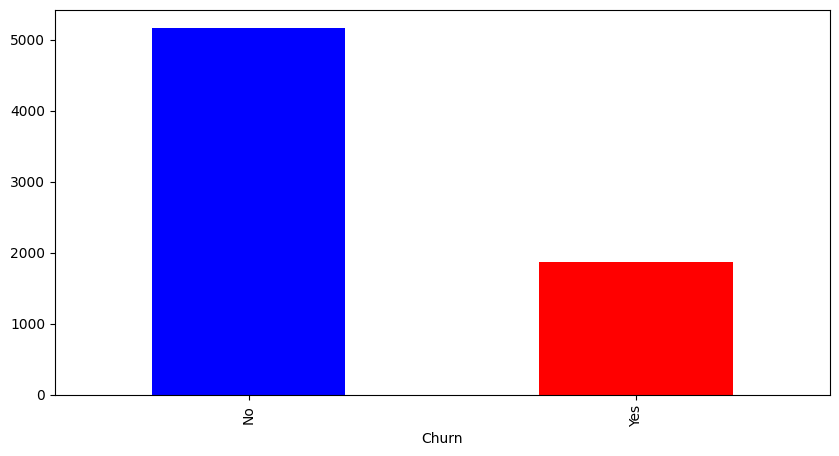

In [54]:
# Plot the Churn Value
plt.figure(figsize = (10,5))
churn_data['Churn'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])
plt.show()

#Model Building
- Decision Tree
- Random Forest

In [55]:
# Encode for Target Variable
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})

# Splitting the data into X and y
X = churn_data.drop(columns = ['Churn'])
y = churn_data['Churn']


In [56]:
X.head(2)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85
1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50


In [57]:
y.head(2)

,Churn
0,0
1,0


In [58]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("-"*30)
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (5625, 17)
y_train: (5625,)
------------------------------
X_test: (1407, 17)
y_test: (1407,)


# Decision Tree

In [72]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediction using DT model
dt_pred = dt_model.predict(X_test)

In [73]:
y_test.head(5)

,Churn
2481,0
6784,0
6125,1
3052,0
4099,0


In [74]:
dt_pred[:5]

array([0, 0, 1, 0, 1])

In [75]:
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_test, dt_pred)*100, 2)

73.13

# Random Forest

In [80]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

# Prediction using RF model
rf_pred = rf_model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_test, rf_pred)*100, 2)

79.03

In [82]:
#Decision Tree
print(f"Decision Tree -> Train Accuracy: {np.round(accuracy_score(y_train, dt_model.predict(X_train))*100, 2)}")
print(f"Decision Tree -> Test Accuracy: {np.round(accuracy_score(y_test, dt_pred)*100, 2)}")

Decision Tree -> Train Accuracy: 99.73
Decision Tree -> Test Accuracy: 73.13


In [83]:
#Random Forest
print(f"Random Forest -> Train Accuracy: {np.round(accuracy_score(y_train, rf_model.predict(X_train))*100, 2)}")
print(f"Random Forest -> Test Accuracy: {np.round(accuracy_score(y_test, rf_pred)*100, 2)}")

Random Forest -> Train Accuracy: 99.73
Random Forest -> Test Accuracy: 79.03


# Hyperparameter Tuning of Random Forest

In [85]:
# Hyperparameter Tuning  using RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameter_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10,12,15,18],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5]
}

# Create a Ransom Forest Classifier
rf2 = RandomForestClassifier(random_state = 42)

# Create a Random Search
random_search = RandomizedSearchCV(estimator = rf2,
                                   param_distributions = parameter_grid,
                                   n_iter = 10,
                                   cv = 5,
                                   random_state = 42)

# Fit the tuned model
rf_tuned = random_search.fit(X_train, y_train)

In [86]:
# Best Params
rf_tuned.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 15}

In [87]:
# Predictions using tuned model
rf_tuned_pred = rf_tuned.predict(X_test)

In [88]:
#Random Forest - Tuned
print(f"Random Forest Tuned -> Train Accuracy: {np.round(accuracy_score(y_train, rf_tuned.predict(X_train))*100, 2)}")
print(f"Random Forest Tuned -> Test Accuracy: {np.round(accuracy_score(y_test, rf_tuned_pred)*100, 2)}")

Random Forest Tuned -> Train Accuracy: 86.79
Random Forest Tuned -> Test Accuracy: 80.1
